## librerías

In [48]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer


In [2]:
df=pd.read_csv('/Users/isaromobru/Desktop/DS102024_/3-MachineLearning/2-Supervisado/2-RegresionLineal/Ejercicio/ejercicios/winequality-red.csv', sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
import seaborn as sns
#sns.pairplot(df)

La que interesa es la ultima, la de target.

<Axes: ylabel='Frequency'>

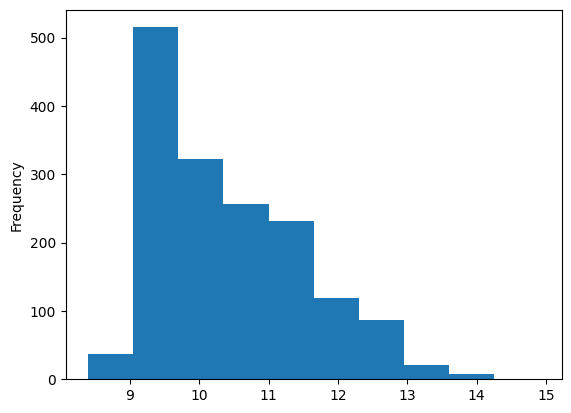

In [7]:
X= df.drop(columns='alcohol')
y= df['alcohol']
y.plot(kind='hist')

<Axes: ylabel='Frequency'>

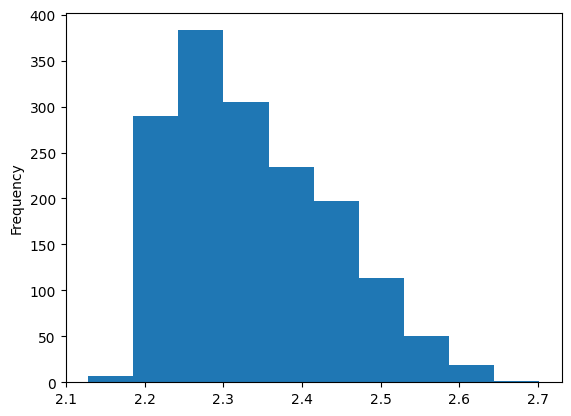

In [8]:
import numpy as np
np.log(y).plot(kind='hist')

In [9]:
y.describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [10]:
np.log(y).describe()

count    1599.000000
mean        2.339021
std         0.098899
min         2.128232
25%         2.251292
50%         2.322388
75%         2.406945
max         2.701361
Name: alcohol, dtype: float64

Para que sea una regresion se necesita que las barras esten juntas, es decir, que sea continua. Por eso se hace el logaritmo

In [11]:
x= df.drop(columns='alcohol')
y = np.log(df['alcohol'])

<Axes: >

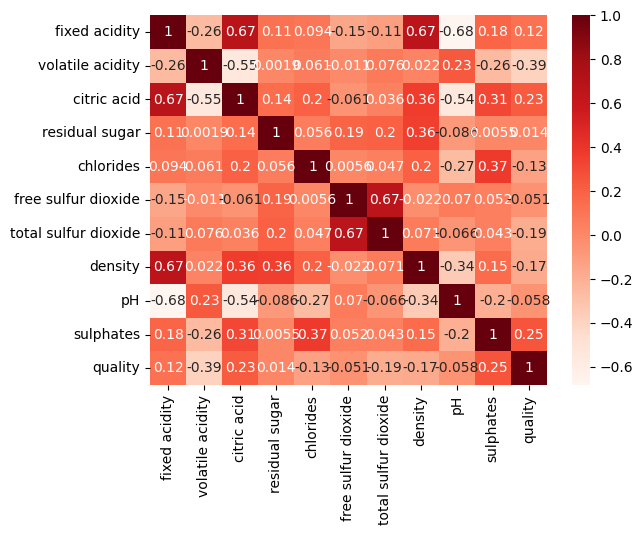

In [12]:
sns.heatmap(x.corr(),annot=True,cmap='Reds')

In [13]:
np.where(np.abs(X.corr())>0.5,X.corr(),0)

array([[ 1.        ,  0.        ,  0.67170343,  0.        ,  0.        ,
         0.        ,  0.        ,  0.66804729, -0.68297819,  0.        ,
         0.        ],
       [ 0.        ,  1.        , -0.55249568,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.67170343, -0.55249568,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.54190414,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.66766645,  0.        ,  0.        ,  0.        ,
         0.   

<Axes: >

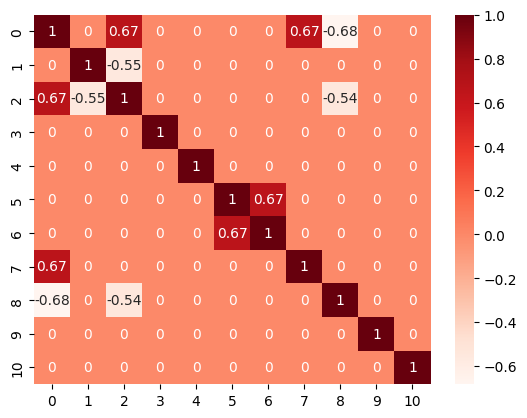

In [14]:
sns.heatmap(np.where(np.abs(X.corr())>0.5,X.corr(),0),annot=True,cmap='Reds')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_percentage_error

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=69)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

RMSE: 0.05994792887068284
R2: 0.6414908626951059
MAPE: 0.020147996076300637


El logaritmo se ve reflejado en el RMSE porque es sobrer la target 

In [19]:
y_pred

array([2.46442547, 2.21526665, 2.26034248, 2.31146869, 2.31505959,
       2.28760107, 2.50336971, 2.29667099, 2.3340369 , 2.38857222,
       2.24008087, 2.30880558, 2.27227078, 2.28720172, 2.30318337,
       2.25802097, 2.24617473, 2.31400871, 2.3100974 , 2.43397803,
       2.37861337, 2.23490752, 2.34272521, 2.41277769, 2.35095446,
       2.42953081, 2.31554056, 2.28474109, 2.45842695, 2.40213762,
       2.24089498, 2.41859283, 2.43406356, 2.26314898, 2.27784051,
       2.30504904, 2.34261477, 2.29246117, 2.28053291, 2.23778463,
       2.2990533 , 2.48925896, 2.36620463, 2.29724595, 2.31216171,
       2.41180424, 2.3139636 , 2.27985233, 2.27882174, 2.25419517,
       2.26419711, 2.26923295, 2.309786  , 2.30811191, 2.41360676,
       2.26595027, 2.44021157, 2.39160024, 2.48398712, 2.38336242,
       2.26601259, 2.38460821, 2.28800955, 2.45075613, 2.39837877,
       2.32238572, 2.29250466, 2.43387414, 2.43704915, 2.47998665,
       2.56347105, 2.26030259, 2.32470982, 2.22551006, 2.38927

esto es el alcohol en logaritmo, para mostralo definitivamente hay que devolverla con datos reales

In [20]:
np.exp(y_pred)

array([11.75672563,  9.1638523 ,  9.58637174, 10.08923176, 10.12552633,
        9.8512768 , 12.22361465,  9.94103352, 10.31951638, 10.89792296,
        9.39409092, 10.06239879,  9.7014056 ,  9.84734351, 10.00598455,
        9.56414274,  9.45151205, 10.1148912 , 10.07540597, 11.40415805,
       10.7899308 ,  9.3456175 , 10.40956617, 11.16493088, 10.49558257,
       11.3535539 , 10.13039749,  9.82314254, 11.68641379, 11.04676493,
        9.40174188, 11.23004557, 11.40513345,  9.61331367,  9.7555905 ,
       10.02466984, 10.40841667,  9.89927151,  9.7818919 ,  9.37254458,
        9.96474441, 12.05234157, 10.65686868,  9.94675082, 10.09622617,
       11.15406759, 10.11443483,  9.77523675,  9.76516775,  9.52762213,
        9.623395  ,  9.67197912, 10.07226894, 10.05542114, 11.17419115,
        9.64028114, 11.4754683 , 10.93097214, 11.98897076, 10.84129458,
        9.64088195, 10.85480907,  9.85530161, 11.59711237, 11.00531977,
       10.19997961,  9.89970202, 11.40297335, 11.43923537, 11.94

- Para reducir el valor es importante informandose para bajar el error, por lo que para bajar el error se puede hacer un future engineer cambiando los datos.

- Otra forma es estandarizar nuestros datos ya que cada uno esta medido de una forma disitinta por lo que se estandariza

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer
esc= PowerTransformer()
esc.fit(X)
X_esc=esc.transform(X)

In [41]:
X=X_esc

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=69)

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

RMSE: 0.060982880169881105
R2: 0.6290052823203862
MAPE: 0.020120746775673826


In [46]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-17,2.799512e-16,1.510848e-16,5.687897e-16,-3.554936e-17,1.155354e-16,-1.955215e-16,-3.554936e-17,-1.777468e-16,-2.399581e-16,-6.221137e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-3.360199e+00,-2.942699e+00,-1.531109e+00,-4.085344e+00,-6.765715e+00,-2.193511e+00,-1.903515e+00,-3.605861e+00,-4.053537e+00,-3.952592e+00,-3.617168e+00
25%,-6.767407e-01,-7.529664e-01,-9.298079e-01,-6.330183e-01,-5.032389e-01,-9.538515e-01,-8.141808e-01,-6.043213e-01,-6.424181e-01,-6.831048e-01,-7.775638e-01
50%,-9.637618e-02,5.781454e-02,4.423533e-02,-4.041238e-02,-1.618474e-02,4.770364e-02,-2.799171e-02,6.897956e-03,1.564952e-02,-4.943516e-02,4.741336e-01
75%,6.654430e-01,7.044123e-01,8.138191e-01,5.600667e-01,4.796797e-01,7.422879e-01,7.792013e-01,5.800789e-01,5.914238e-01,7.091934e-01,4.741336e-01
max,2.725096e+00,3.818735e+00,2.860035e+00,2.360793e+00,2.933821e+00,2.482690e+00,2.431673e+00,3.621990e+00,4.156843e+00,2.898250e+00,2.741353e+00


No sirve lo de escalar para reducir el error, por lo que la mejor forma este caso es investigar y  hacer lo de la multiplicación.

In [47]:
#pd.DataFrame(lr.coef_.reshape(1,-1), columns=X.columns)

In [24]:
lr.intercept_

np.float64(53.23877019391017)

Lo suyo es hacer varios notebooks y es importante hacer diferentes notebooks con los experimentos que se hagan.

----------------------------------------------------------------

## Clase regresión lineal 

In [58]:
import numpy as np
import pandas as pd

class LinearRegressionBootcamp:
    def __init__(self, normalized=False):
        self.coeficientes = None
        self.intercepto = None
        self.media = None
        self.desviacion_estandar = None
        self.normalized = normalized

    def _normalizado_features(self, X:pd.DataFrame):
        if self.media is None or self.desviacion_estandar is None:
            self.media = X.mean(axis=0)
            self.desviacion_estandar = X.std(axis=0)

        return (X - self.media) / self.desviacion_estandar

    def fit(self, df:pd.DataFrame, target:str):
        X = df.drop(columns=target)
        self.feature_columns = X.columns
        y = df[target].values

        if self.normalized:
            X = self._normalizado_features(X)

        X = np.c_[np.ones(X.shape[0]), X]

        theta = np.linalg.solve(X.T @ X, X.T @ y)

        self.intercepto = theta[0]
        self.coeficientes = theta[1:]  # Corregido: los coeficientes son desde el índice 1

    def predict(self, df: pd.DataFrame):
        if self.coeficientes is None or self.intercepto is None:
            raise ValueError('El modelo no ha sido entrenado.')

        X = df[self.feature_columns].copy()

        if self.normalized:
            X = self._normalizado_features(X)

        X = X.values  # Convertimos a numpy array después de normalizar

        y_pred = self.intercepto + np.dot(X, self.coeficientes)

        return y_pred

In [59]:
model = LinearRegressionBootcamp(normalized=True)

model.fit(df, 'alcohol')

print('Intercepto:', model.intercepto)
print('Coeficientes:', model.coeficientes)

y_pred = model.predict(df)

print('RMSE:', root_mean_squared_error(df['alcohol'].values, y_pred))
print('R2:', r2_score(df['alcohol'].values, y_pred))
print('MAPE:', mean_absolute_percentage_error(df['alcohol'].values, y_pred))

Intercepto: 10.422983114446492
Coeficientes: [ 0.85745535  0.10552457  0.15968768  0.36993179 -0.04390991 -0.03157529
 -0.04573902 -1.08263909  0.55842251  0.1617152   0.18753436]
RMSE: 0.5919529738606677
R2: 0.6912531089251452
MAPE: 0.04329530043897454
